In [3]:
import os
#import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt


In [4]:
for i in os.listdir(r"D:\comp30\RawData\Testing\img"):
    filepath=os.path.join(r"D:\comp30\RawData\Testing\img",i)
    filepath=os.path.join(filepath,os.listdir(filepath)[0])
    savepath=os.path.join(r"D:\comp30\RawData\Testing\img",i)
    savepath2=os.path.join(r"D:\comp30\RawData_hist\testdata",i)
    if not os.path.exists(savepath2):
        os.makedirs(savepath2)
        
    image=sitk.ReadImage(filepath)
    print(image.GetSize())
    sitk.WriteImage(image, savepath+r"\ct.mha", True)
    sitk.WriteImage(image, savepath2+r"\ct.mha", True)
    print(savepath)
    print(savepath2)

(512, 512, 138)
D:\comp30\RawData\Testing\img\img0061.nii
D:\comp30\RawData_hist\testdata\img0061.nii
(512, 512, 90)
D:\comp30\RawData\Testing\img\img0062.nii
D:\comp30\RawData_hist\testdata\img0062.nii
(512, 512, 95)
D:\comp30\RawData\Testing\img\img0063.nii
D:\comp30\RawData_hist\testdata\img0063.nii
(512, 512, 159)
D:\comp30\RawData\Testing\img\img0064.nii
D:\comp30\RawData_hist\testdata\img0064.nii
(512, 512, 152)
D:\comp30\RawData\Testing\img\img0065.nii
D:\comp30\RawData_hist\testdata\img0065.nii
(512, 512, 171)
D:\comp30\RawData\Testing\img\img0066.nii
D:\comp30\RawData_hist\testdata\img0066.nii
(512, 512, 173)
D:\comp30\RawData\Testing\img\img0067.nii
D:\comp30\RawData_hist\testdata\img0067.nii
(512, 512, 86)
D:\comp30\RawData\Testing\img\img0068.nii
D:\comp30\RawData_hist\testdata\img0068.nii
(512, 512, 97)
D:\comp30\RawData\Testing\img\img0069.nii
D:\comp30\RawData_hist\testdata\img0069.nii
(512, 512, 120)
D:\comp30\RawData\Testing\img\img0070.nii
D:\comp30\RawData_hist\testd

In [17]:
def histeq(data,nbr_bins = 2048):
    """对一幅灰度图像进行直方图均衡化"""
    #计算图像的直方图
    #在numpy中，也提供了一个计算直方图的函数histogram(),第一个返回的是直方图的统计量，第二个为每个bins的中间值
    imhist,bins = np.histogram(data,nbr_bins, normed=True)
    xxxx = imhist
    imhist=imhist*0.25+0.75/2048
    for x, y in zip(xxxx,imhist):
        print(x,y)
    #print("bins:",bins[:-1])
    cdf = imhist.cumsum()   #

    plt.figure("tryshow")
    #plt.bar(range(len(imhist)),imhist)  
    plt.plot(cdf*2048)
    plt.xlabel("HU")
    plt.ylabel("New HU")
    plt.savefig(savepath+r"\change.png")
    plt.clf()
    
    print("cdf:",cdf)
    cdf = 2048.0 * cdf / cdf[-1]
    print("cdf:",cdf)
    #使用累积分布函数的线性插值，计算新的像素值
    im2 = np.interp(data,bins[:-1],cdf)
    return im2,cdf



array_shape=[]
array_path=[]
array_originmax=[]
array_originmin=[]
array_histmax=[]
array_histmin=[]

#for i in os.listdir(r"D:\comp30\RawData\Testing\img"):

#     filepath=os.path.join(r"D:\comp30\RawData\Testing\img",i)
#     filepath=os.path.join(filepath,os.listdir(filepath)[0])
filepath = r"E:/kits19/data/case_00001/imaging.nii.gz"
print(filepath)
savepath=os.path.join(r"test")
if not os.path.exists(savepath):
    os.makedirs(savepath) 


image=sitk.ReadImage(filepath)    
inputimagearray=sitk.GetArrayFromImage(image)

#array_path.append(i)
array_shape.append(inputimagearray.shape)
array_originmax.append(np.max(inputimagearray))
array_originmin.append(np.min(inputimagearray))


labelarry=inputimagearray
labelarry=labelarry.flatten()
n, bins, patches = plt.hist(labelarry, bins=1024, normed=1,edgecolor='None',facecolor='red')  
plt.savefig(savepath+r"\original.png")
plt.clf()
print("saveing original")
labelarry=labelarry+1024

processed=[]
cleanarrayindex=[]
labelarry[labelarry < 1] = 0
labelarry[labelarry > 2048] = 2048
for index,elem in enumerate(labelarry):
    if elem != 0 :
        processed.append(elem)
        cleanarrayindex.append(index)


n, bins, patches = plt.hist(processed, bins=1024,edgecolor='None',normed=1,facecolor='red')  
plt.savefig(savepath+r"\processed.png")
plt.clf()
print("saveing processed")

data2,cdf = histeq(processed)
n, bins, patches = plt.hist(data2, bins=1024,edgecolor='None', normed=1,facecolor='green')  
plt.savefig(savepath+r"\hist1.png")
plt.clf()

labelarry[cleanarrayindex]=data2
labelarry=(labelarry-1024)
array_histmax.append(np.max(labelarry))
array_histmin.append(np.min(labelarry))

outimagearray=labelarry.reshape(inputimagearray.shape)
outimage = sitk.GetImageFromArray(outimagearray.astype(np.int32))
outimage.SetOrigin(image.GetOrigin())
outimage.SetSpacing(image.GetSpacing())
outimage.SetDirection(image.GetDirection())
sitk.WriteImage(outimage, savepath+r"\hist_ct_.75.mha", True)

#list_df=pd.DataFrame({'path':array_path,'shape':array_shape,'origin max':array_originmax,
#                  'origin min':array_originmin,'hist max':array_histmax,'hist min':array_histmin})
#list_df

E:/kits19/data/case_00001/imaging.nii.gz
saveing original
saveing processed


C:\Users\VMLAB\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


0.0018047763916934705 0.0008174050354233676
0.00187528264253905 0.0008350315981347625
0.002152410847164866 0.0009043136492912165
0.002475484796373179 0.0009850821365932948
0.0027768292010995114 0.001060418237774878
0.0030945855329081846 0.0011398573207270462
0.0034262288799403766 0.0012227681574850941
0.0037358748888085924 0.0013001796597021482
0.004013615193278972 0.001369614735819743
0.004293038772321898 0.0014394706305804745
0.004519630483530997 0.0014961185583827492
0.004736237316025664 0.001550270266506416
0.004940219589226223 0.0016012658348065559
0.005096496330791168 0.001640335020197792
0.005222780179972534 0.0016719059824931335
0.005326837153548213 0.0016979202258870533
0.005365973287359949 0.0017077042593399872
0.005381084502272593 0.0017114820630681482
0.0053821556770005784 0.0017117498567501446
0.005349867410199889 0.0017036777900499723
0.005309851382861595 0.0016936737832153987
0.005210767720522989 0.0016689028676307473
0.005077865541772287 0.0016356773229430717
0.00494569

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

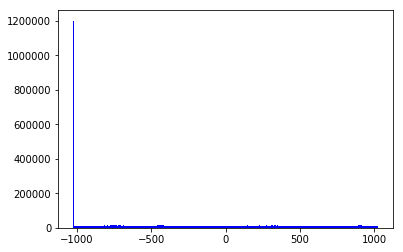

In [27]:
img = sitk.ReadImage("test/hist_ct.mha")
imgArray = sitk.GetArrayFromImage(img)
plt.hist(imgArray.flatten(), 2049,[-1024,1024],color="b")
#plt.ylim([0,1000000])
#plt.xlim([-1000,3000])
plt.show()

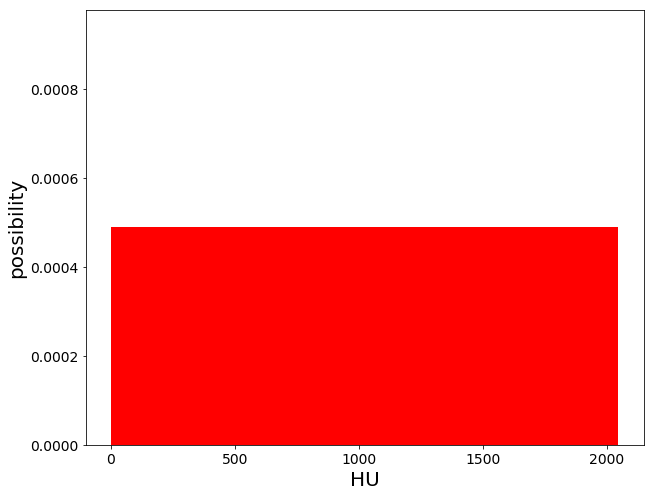

In [15]:
plt.figure(figsize=(10,8))


plt.hist(range(2048), bins=2048, normed=1,edgecolor='None',facecolor='red')  
plt.tick_params(labelsize=14)
plt.xlabel("HU",fontsize=20)
plt.ylabel("possibility",fontsize=20)
plt.ylim([0,2/2048])
#plt.title(u"DICE in training",fontsize=14)


plt.show()